In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X, y = make_moons(100, noise=0.25,random_state=2)

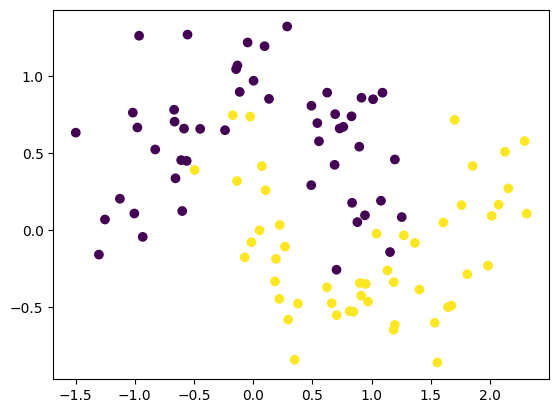

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [5]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
adam = Adam(learning_rate=0.01)
## In this we are using adam optimiser and log loss 
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 11s 1ms/step


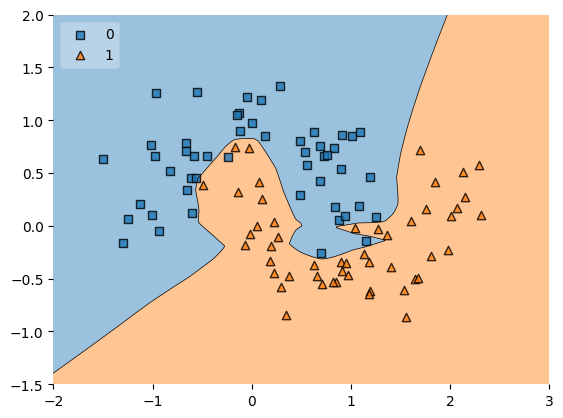

In [7]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

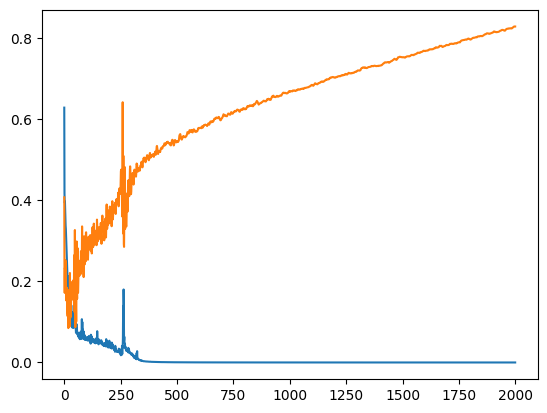

In [8]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [24]:
from tensorflow import keras

In [25]:
from keras.layers import BatchNormalization

In [26]:
### Now training a new model by using regularization
model2 = Sequential()

model2.add(Dense(128, input_dim = 2, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)))
model2.add(BatchNormalization())
model2.add(Dense(128, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.001)))
model2.add(BatchNormalization())
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18049 (70.50 KB)
Trainable params: 17537

In [27]:
## In the above we have set the regularization strength as 0.001

In [28]:
### Now for implementing early stopping we have to implement a callback function 
from keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    #  "val_loss", which means the validation loss. The training will stop when the validation loss stops decreasing
    min_delta=0.00001,
    #  minimum change in the monitored quantity to qualify as an improvement. In this case, it's set to 0.00001.
    patience=20,
    # The number of epochs with no improvement after which training will be stopped.
    verbose=1,
    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. If set to 1, it will print a message when training stops due to early stopping. 
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [29]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2, callbacks= callback)

Epoch 1/2000
3/3 [==============================] - 2s 117ms/step - loss: 0.7028 - accuracy: 0.6000 - val_loss: 0.6824 - val_accuracy: 0.8500
Epoch 2/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.4038 - accuracy: 0.9000 - val_loss: 0.6482 - val_accuracy: 0.8500
Epoch 3/2000
3/3 [==============================] - 0s 21ms/step - loss: 0.3433 - accuracy: 0.9375 - val_loss: 0.6448 - val_accuracy: 0.8000
Epoch 4/2000
3/3 [==============================] - 0s 20ms/step - loss: 0.3465 - accuracy: 0.9250 - val_loss: 0.6540 - val_accuracy: 0.8000
Epoch 5/2000
3/3 [==============================] - 0s 20ms/step - loss: 0.3075 - accuracy: 0.9375 - val_loss: 0.6681 - val_accuracy: 0.8000
Epoch 6/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.3247 - accuracy: 0.9250 - val_loss: 0.6413 - val_accuracy: 0.8000
Epoch 7/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.3173 - accuracy: 0.9375 - val_loss: 0.6096 - val_accuracy: 0.8000
Epoch 8/2000

9600/9600 [==============================] - 12s 1ms/step


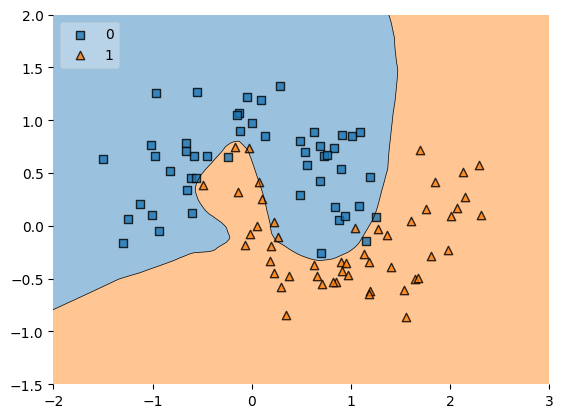

In [30]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

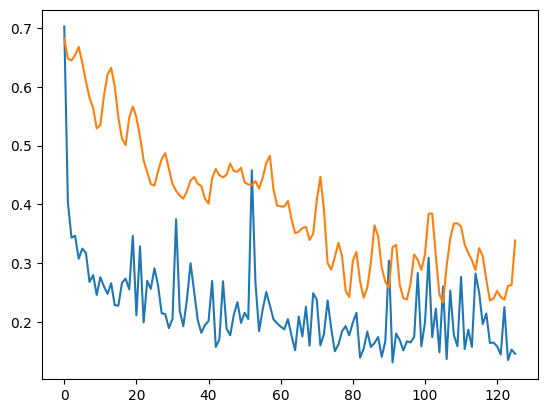

In [31]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])